 # <center> Analyzing Fitness Survey Data </center>

#### In this notebook, I will be visualizing some of the key features of [this](https://github.com/akhilsali/Fitness-survey-analysis/blob/main/fitness%20analysis.csv) fitness survey data. Lets start by reading in the data and cleaning it for further analysis

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("../input/fitness-analysis/fitness analysis.csv")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 18 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   Timestamp                                                                                                              545 non-null    object
 1   Your name                                                                                                              545 non-null    object
 2   Your gender                                                                                                            545 non-null    object
 3   Your age                                                                                                               545 non-null    object
 4   How impo

#### Looks like the dataset doesnt have any missing values. However, the column names are too long, so lets shorten them by using abbreviations.

In [4]:
df.head()

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,2019/07/04 5:43:35 AM GMT+5:30,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,2019/07/04 5:44:29 AM GMT+5:30,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


In [5]:
df.columns

Index(['Timestamp', 'Your name ', 'Your gender ', 'Your age ',
       'How important is exercise to you ?',
       'How do you describe your current level of fitness ?',
       'How often do you exercise?',
       'What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)',
       'What form(s) of exercise do you currently participate in ?                        (Please select all that apply)',
       'Do you exercise ___________ ?',
       'What time if the day do you prefer to exercise?',
       'How long do you spend exercising per day ?',
       'Would you say you eat a healthy balanced diet ?',
       'What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)',
       'How healthy do you consider yourself?',
       'Have you ever recommended your friends to follow a fitness routine?',
       'Have you ever purchased a fitness equipment?',
       'What motivates you to exer

In [6]:
new_cols=['Timestamp','Name','Gender','Age','Exercise_importance','Fitness_level','Regularity','Barriers','Exercises','Do_you','Time','Time_spent','Balanced_diet','prevents_balanced','Health_level','Recommend_fitness','Equipment','Motivation']

In [7]:
column_reference=pd.DataFrame(new_cols,df.columns)
column_reference

,0
Timestamp,Timestamp
Your name,Name
Your gender,Gender
Your age,Age
How important is exercise to you ?,Exercise_importance
How do you describe your current level of fitness ?,Fitness_level
How often do you exercise?,Regularity
"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",Barriers
What form(s) of exercise do you currently participate in ? (Please select all that apply),Exercises
Do you exercise ___________ ?,Do_you


#### We'll save the old column names as a dataframe for reference

In [8]:
df.columns=new_cols

#### Since we do not need the timestamp and names of participants for our analysis, lets drop these columns

In [9]:
df.drop(columns=['Timestamp','Name'],inplace=True)

In [10]:
df.head()

,Gender,Age,Exercise_importance,Fitness_level,Regularity,Barriers,Exercises,Do_you,Time,Time_spent,Balanced_diet,prevents_balanced,Health_level,Recommend_fitness,Equipment,Motivation
0,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


### 1. Importance of Exercise for different age groups

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

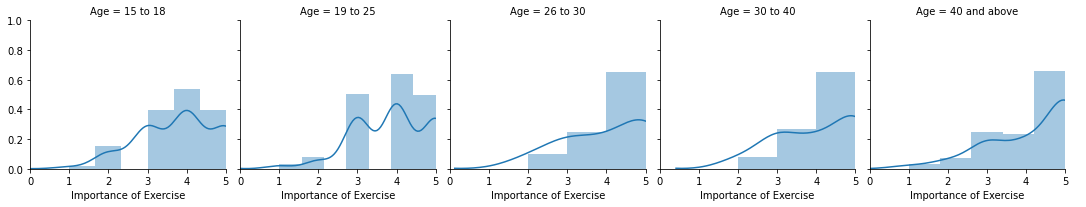

In [12]:
age_vals=df["Age"].unique()
grid = sns.FacetGrid(df, col='Age',col_order=age_vals[[1,0,4,3,2]])
grid.map(sns.distplot,'Exercise_importance')
grid.add_legend()
grid.set(xlim=(0,5))
grid.set(ylim=(0,1))
grid.set(xlabel="Importance of Exercise")
grid.despine()
plt.show()

### 2. Types of Exercises preferred by participants
#### Since participants could select multiple options for this question,lets create a dictionary to find the top preferred exercise.

In [13]:
exercises_list={}
for selected_options in df['Exercises']:
    for exercise in selected_options.split(";"):
        if exercise in exercises_list:
            exercises_list[exercise]+=1
        else:
            exercises_list[exercise]=1

            
        

In [14]:
sorted_list={}
for i in sorted(exercises_list,key=exercises_list.get,reverse=True):
    sorted_list[i]=exercises_list[i]
     

#### Now, lets convert the sorted dictionary into percentages and plot it on a bar graph.

In [15]:
count=sum(sorted_list.values())
for i in sorted_list:
    sorted_list[i]=(sorted_list[i]/count)*100

In [16]:
sorted_list

{'Walking or jogging': 38.16254416961131,
 'Gym': 16.489988221436985,
 'Team sport': 10.954063604240282,
 "I don't really exercise": 10.60070671378092,
 'Yoga': 9.540636042402827,
 'Lifting weights': 5.535924617196701,
 'Swimming': 4.829210836277975,
 'Zumba dance': 3.8869257950530036}

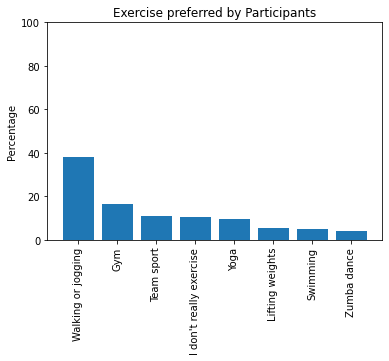

In [17]:
plt.bar(sorted_list.keys(),sorted_list.values())
plt.xticks(rotation=90)
plt.title("Exercise preferred by Participants")
plt.ylabel("Percentage")
plt.ylim(0,100)
plt.show()

### 3. At what time do people prefer to exercise?

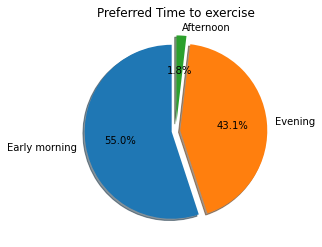

In [18]:
times=df["Time"].value_counts(normalize=True)*100
plt.pie(times,labels=times.index,explode=(0.05,0.05,0.1),shadow=True,autopct='%.1f%%',startangle=90)
plt.title("Preferred Time to exercise")
plt.show()

### 4. Average time spent per day for Exercise?

In [19]:
df["Time_spent"].unique()

array(["I don't really exercise", '30 minutes', '1 hour', '2 hours',
       '3 hours and above'], dtype=object)

#### To find out approximately, the average time spent by an induvidual on exercise daily, lets convert the 'Time_spent' column into numerical values (minutes). 

In [20]:
times=df["Time_spent"].str.split(" ",n=1,expand=True)

In [21]:
df["Time_spent_minutes"]=times[0]

In [22]:
def convertor(val):
    if val=="I":
        return 0
    else:
        return int(val)

In [23]:
df["Time_spent_minutes"]=df["Time_spent_minutes"].apply(convertor)

In [24]:
df["Time_spent_minutes"]=df["Time_spent_minutes"].apply(lambda x:x*60 if x!=30 else x)

In [25]:
df["Time_spent_minutes"].value_counts()

30     203
60     167
0      105
120     64
180      6
Name: Time_spent_minutes, dtype: int64

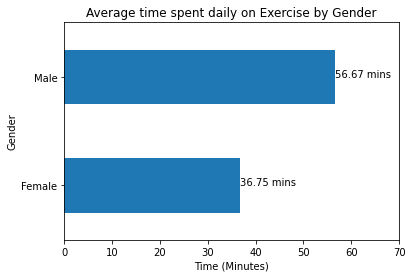

In [26]:
df.groupby("Gender").mean()["Time_spent_minutes"].plot.barh()
for i,v in enumerate(df.groupby("Gender").mean()["Time_spent_minutes"]):
    plt.text(v,i,(str(round(v,2))+" mins"))
plt.title("Average time spent daily on Exercise by Gender")
plt.xlabel("Time (Minutes)")
plt.xlim(0,70)
plt.show()

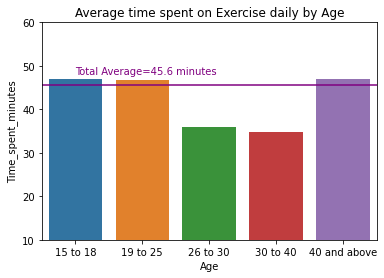

In [27]:
groups=df.groupby("Age").mean()["Time_spent_minutes"]
ax=sns.barplot(groups.index,groups)
ax.text(0,48,"Total Average=45.6 minutes",c="purple")
plt.title("Average time spent on Exercise daily by Age")
plt.ylim(10,60)
plt.axhline(df["Time_spent_minutes"].mean(),color="purple")
plt.show()

### 5. Top motivation factors for daily excersice?

In [28]:
motivation_list={}
for selected_options in df['Motivation']:
    for motivation in selected_options.split(";"):
        if motivation in motivation_list:
            motivation_list[motivation]+=1
        else:
            motivation_list[motivation]=1

In [29]:
motivation_list

{"I'm sorry ... I'm not really interested in exercising": 42,
 'I want to be fit': 341,
 'I want to be flexible': 173,
 'I want to relieve stress': 173,
 'I want to lose weight': 198,
 'I want to increase muscle mass and strength': 89,
 'I want to achieve a sporting goal': 54,
 'Doing exercises prevents many diseases.So yeah saves a lot of money .': 1,
 'Exercising gives you discipline and focus and removed bad thoughts from your mind.': 1,
 'Control Diabetes ': 1,
 'To maintain healthy body and mind': 1,
 'I want to think clearly and I want to play cricket with my grandkids': 1,
 'I dont wanna gain weight😉': 1,
 'Going to class on time 😉': 1,
 'See the answer to what barriers, if any, prevent you from exercising  regularly ': 1,
 'My dad motivates me ': 1,
 'Reaching class on time 😅': 1,
 'Personal reasons': 1,
 'Not doing exercise': 1,
 'I want to look young and think young': 1,
 'Gotta get that alcohol and **** out of the system': 1}

In [30]:
top_5_motivation=pd.DataFrame.from_dict(motivation_list.items()).sort_values(by=1,ascending=False)[:5]

In [31]:
top_5_motivation[0]=top_5_motivation[0].apply(lambda x:x.replace("I want to ",""))

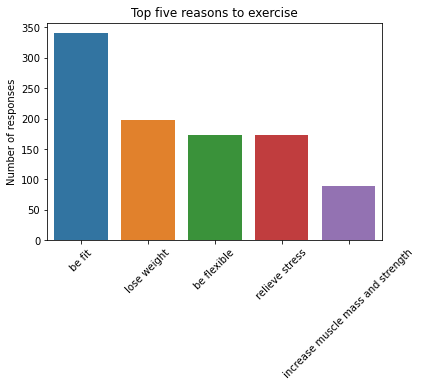

In [32]:
sns.barplot(x=0,y=1,data=top_5_motivation)
plt.xticks(rotation=45)
plt.ylabel("Number of responses")
plt.title("Top five reasons to exercise")
plt.xlabel("")
plt.show()

### 6. Top Barriers from performing daily excercise?

In [33]:
barrier_list={}
for selected_options in df['Barriers']:
    for barrier in selected_options.split(";"):
        if barrier in barrier_list:
            barrier_list[barrier]+=1
        else:
            barrier_list[barrier]=1

In [34]:
barrier_list

{"I don't have enough time": 290,
 "I can't stay motivated": 178,
 "I'll become too tired": 112,
 'I exercise regularly with no barriers': 67,
 "I don't really enjoy exercising": 59,
 'Less stamina': 1,
 'I have an injury': 31,
 'I am not regular in anything': 1,
 'I am lazy': 1,
 'Laziness ': 2,
 "I'm too lazy": 1,
 'Laziness': 3,
 'Lazy': 1,
 'No gym near me': 1,
 'Travel': 1,
 'Allergies': 1,
 'I always busy with my regular works': 1,
 "My friends don't come ": 1,
 'Laziness mostly ': 2,
 'Travel time I skip': 1}

In [35]:
top_5_barrier=pd.DataFrame.from_dict(barrier_list.items()).sort_values(by=1,ascending=False)[:6].drop(3,axis=0)

#### We'll drop the fouth row as it just mentions there arent any barriers

In [36]:
top_5_barrier["Percentage"]=(top_5_barrier[1]/top_5_barrier[1].sum())*100

In [37]:
top_5_barrier

,0,1,Percentage
0,I don't have enough time,290,43.283582
1,I can't stay motivated,178,26.567164
2,I'll become too tired,112,16.716418
4,I don't really enjoy exercising,59,8.805970
6,I have an injury,31,4.626866


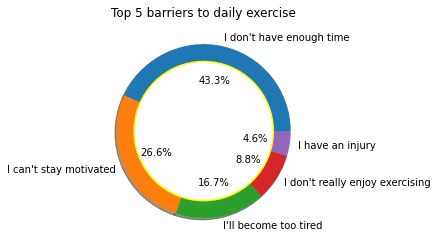

In [38]:
plt.pie(top_5_barrier["Percentage"],labels=top_5_barrier[0],autopct="%.1f%%",shadow=True)
centre_circle = plt.Circle((0,0),0.8,color='yellow', fc='white',linewidth=1.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Top 5 barriers to daily exercise")
plt.show()